# Exploratory data analysis: Bike Sharing Dataset

In [23]:
# Load packages
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import altair as alt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
pd.set_option("display.max_colwidth", 200)
%matplotlib inline
alt.data_transformers.disable_max_rows()
from scipy.stats import pearsonr

#add this because I use jupyter notebook
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## 1. Description of the dataset

The dataset we chose is the Bike Sharing Dataset from [UCI machine learning repository]("https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset"). This dataset contains the hourly and daily count of rental bikes in 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information. It is provided by Hadi Fanaee-T, Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto.  
For the purpose of this project, we would use the hourly dataset, which is more complete and have a greater number of observations than the daily dataset.

## 2. Load the dataset

We downloaded and splitted the dataset into 80% train set and 20% test using the [download script]("https://github.com/UBC-MDS/DSCI_522_Group_409/blob/master/src/data_download.py") in our group repo.

In [25]:
# Load the dataset
bike_data_train = pd.read_csv("../data/train.csv")
bike_data_train_target = pd.read_csv("../data/train_target.csv")

# Combine the feature and target
bike_data = pd.concat([bike_data_train, bike_data_train_target], axis = 1)

# Preview
bike_data

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0         1714  2011-03-17       1   0     3   1        0        4   
1        12835  2012-06-23       3   1     6  23        0        6   
2         8841  2012-01-09       1   1     1   4        0        1   
3        13930  2012-08-08       3   1     8  14        0        3   
4         9889  2012-02-22       1   1     2   1        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
13898    16305  2012-11-17       4   1    11   2        0        6   
13899       80  2011-01-04       1   0     1  11        0        2   
13900    12120  2012-05-25       2   1     5   4        0        5   
13901    14148  2012-08-17       3   1     8  16        0        5   
13902     5641  2011-08-28       3   0     8  11        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               1           1  0.36  0.3485  0.71     0.2239       1   
1               0           1  0.72  0.6515  0.44     0.0000      69   
2               1           1  0.22  0.2424  0.64     0.1045       0   
3               1           2  0.80  0.7424  0.52     0.2537      63   
4               1           1  0.32  0.3333  0.70     0.1343       3   
...           ...         ...   ...     ...   ...        ...     ...   
13898           0           1  0.26  0.2576  0.65     0.1940       8   
13899           1           1  0.22  0.2121  0.51     0.2985       7   
13900           1           2  0.62  0.5606  0.88     0.0000       3   
13901           1           2  0.84  0.2424  0.32     0.4478     116   
13902           0           1  0.70  0.6515  0.58     0.3881      59   

       registered  cnt  
0              11   12  
1             156  225  
2               4    4  
3             173  236  
4               4    7  
...           ...  ...  
13898          41   49  
13899          50   57  
13900           6    9  
13901         372  488  
13902         178  237  

[13903 rows x 17 columns]

## 3. Explore the dataset

### 3.1 Pandas Profile Report
We initially explored this dataset by using the pandas profile report. 

In [3]:
profile = ProfileReport(bike_data)
profile

**Findings from the pandas profile report:**
    1. The target `cnt` (i.e. count of total rental bikes) is highly correlated with `registered` (i.e. count of registered users). Since our research question does not care about whether the user is registered or casual users. We decided to remove `registered` and `casual` columns.
    2. The report is showing that `temp` and `atemp` are highly correlated with each other. They both are normalized temperatures in Celsius while `atemp` is the feeling temperature and `temp` is the real temperature. We decided to create a new column called `temp_actual` (i.e. the non-normalized actual temperature) and remove `temp` and `atemp` columns.
    3. `dtday` is a DateTime column, which has a high cardinality. We decided to remove it because there are other time-related columns, such as `mnth` and `hr`, we can use to answer our research question.

### 3.2 Further explore

After using pandas profile report, we also did further exploring in some useful features in our dataset as below.

In [26]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 17 columns):
instant       13903 non-null int64
dteday        13903 non-null object
season        13903 non-null int64
yr            13903 non-null int64
mnth          13903 non-null int64
hr            13903 non-null int64
holiday       13903 non-null int64
weekday       13903 non-null int64
workingday    13903 non-null int64
weathersit    13903 non-null int64
temp          13903 non-null float64
atemp         13903 non-null float64
hum           13903 non-null float64
windspeed     13903 non-null float64
casual        13903 non-null int64
registered    13903 non-null int64
cnt           13903 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 1.8+ MB


In [27]:
table_descr = bike_data.describe()
# table_descr.to_csv(output_path + "/tab_1.csv", index = True) #<--In .py
table_descr.to_csv("../results/tab_1.csv", index = True)
table_descr

instant        season            yr          mnth            hr  \
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000   
mean    8701.550960      2.506581      0.502697      6.550601     11.565993   
std     5009.241014      1.105796      0.500011      3.425914      6.895803   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     4369.500000      2.000000      0.000000      4.000000      6.000000   
50%     8691.000000      3.000000      1.000000      7.000000     12.000000   
75%    13047.500000      3.000000      1.000000     10.000000     18.000000   
max    17379.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000   
mean       0.028195      2.997051      0.680788      1.426527      0.498538   
std        0.165537      2.010383      0.466188      0.639350      0.192675   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      0.980000   

              atemp           hum     windspeed        casual    registered  \
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000   
mean       0.477102      0.626504      0.190027     36.290872    154.357621   
std        0.172016      0.193304      0.122040     50.081632    151.104995   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.470000      0.104500      4.000000     35.000000   
50%        0.484800      0.620000      0.194000     17.000000    116.000000   
75%        0.621200      0.780000      0.253700     49.000000    221.000000   
max        1.000000      1.000000      0.850700    362.000000    886.000000   

                cnt  
count  13903.000000  
mean     190.648493  
std      181.565047  
min        1.000000  
25%       40.000000  
50%      143.000000  
75%      283.000000  
max      977.000000

In [28]:
print("The dataframe columns are: ", list(bike_data.columns), "\n")

month_list = sorted(list(bike_data['mnth'].unique()))
print("- The month ranges from {0} to {1}, which represents the {2} months of the year.".format(month_list[0],
                                                                           month_list[-1],
                                                                           len(month_list)),"\n")

hour_list = sorted(list(bike_data['hr'].unique()))
print("- The hour ranges from {0} to {1}, that represents the {2} hours of the day.".format(hour_list[0],
                                                                           hour_list[-1],
                                                                           len(hour_list)),"\n")

print("- The holiday type contains: ", list(bike_data['holiday'].unique()),"\n")

weekdays = sorted(list(bike_data['weekday'].unique()))
print("- The weekday type contains: ", weekdays,"\n")

print("- The workingday type contains: ", sorted(list(bike_data['workingday'].unique())),"\n")

print("- The weather type contains: ", list(bike_data['weathersit'].unique()),"\n")

temp_list = sorted(list(bike_data['temp'].unique()))
print("- The normalized tempereature ranges from {0} to {1}".format(temp_list[0],
                                                                    temp_list[-1]), "\n")

hum_list = sorted(list(bike_data['temp'].unique()))
print("- The normalized humidity ranges from {0} to {1}".format(hum_list[0],
                                                                hum_list[-1]), "\n")

wind_list = sorted(list(bike_data['windspeed'].unique()))
print("- The normalized windspeed ranges from {0} to {1}".format(wind_list[0],
                                                                wind_list[-1]), "\n")

cnt_list = sorted(list(bike_data['cnt'].unique()))
print("- The target count of bike rentals ranges from {0} to {1}".format(cnt_list[0],
                                                                cnt_list[-1]), "users.\n")

The dataframe columns are:  ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'] 

- The month ranges from 1 to 12, which represents the 12 months of the year. 

- The hour ranges from 0 to 23, that represents the 24 hours of the day. 

- The holiday type contains:  [0, 1] 

- The weekday type contains:  [0, 1, 2, 3, 4, 5, 6] 

- The workingday type contains:  [0, 1] 

- The weather type contains:  [1, 2, 3, 4] 

- The normalized tempereature ranges from 0.02 to 0.98 

- The normalized humidity ranges from 0.02 to 0.98 

- The normalized windspeed ranges from 0.0 to 0.8507 

- The target count of bike rentals ranges from 1 to 977 users.



**Findings from further exploring**:
1. We found that most of the features are already normalized, which would be great when building the machine learning model.
2. During EDA, 3 columns (i.e. `temp`, `hum`, `windspeed`) required to be transformed back to the non-normalized numbers so that we can better interpret the relationship between these features and the target.
3. There are 4 categorical columns (i.e. `holiday, weekday`, `workingday`, `weatherday`) which are already coded as numbers (binary variables) in the dataset. We will use the descriptions from the source website to interpret these columns in our analysis.

    - `holiday` : 1 for holiday, 0 for non-holiday
    - `weekday` : Day of the week, starting from Sunday as 0 until Saturday as 6
    - `workingday` : 1 for workingday, 0 for weekends and holidays.
    - `weathersit` : 
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    - `temp` : real temperature with values normalized considering t_min=-8, t_max=+39.
    - `atemp` : feeling temperature with values normalized considering t_min=-16, and t_max=+50.
    - `hum` : normalized humidity, which values are divided to 100 (max).
    - `windspeed` : normalized wind speed, which values are divided to 67 (max).

### 3.3 Checking the Null Values in the dataset

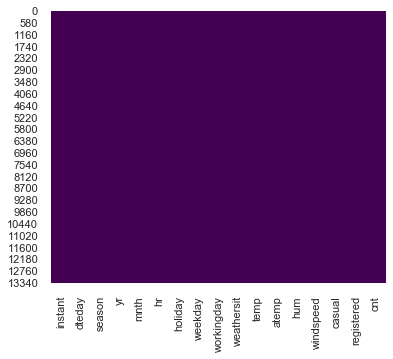

In [29]:
sns.set(rc={'figure.figsize':(6,5)})
# chart_nulls = sns.heatmap(bike_data.isnull(), cmap='viridis', #<--In .py
#                   cbar=False).get_figure().savefig(output_path + "fig_1_nulls.png") #<--In .py
chart_nulls = sns.heatmap(bike_data.isnull(), cmap='viridis', 
                          cbar=False).get_figure().savefig("../results/fig_1_nulls.png")
chart_nulls

In [30]:
# nulls in any varliable
pd.DataFrame(bike_data[bike_data.isnull().any(axis=1)])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

**Findings**: As we can see from the plot and dataframe above, there is no null values in the dataset.

## 4. Initial Thoughts

Some findings and important observations:  
- The original dataset has 17 variables with 13,903 observations, but not all variables would be useful for the model: in some cases, the variables are highly correlated as `temp` and `atemp`, and other variables that won't be as useful as `instant` that is the id. of the observation.  
- The operation of the bike rentals runs 24 hr even on weekends and holidays. However, if we consider that the target variable `cnt` ranges from 1 to 977 users, we could find out that there are no observations for some combinations of hours and days (probably because nobody rent any bike in that specific moment); for example, there is no data at 10 am of January 2nd of 2012 (dteday='2012-01-02', yr=10).
- The real temperature (`temp`) and feeling temperature `atemp` are normalized with different scales, which can be confusing to interpret.
- The original source of the data comes from the company [Capital Bikeshare](https://s3.amazonaws.com/capitalbikeshare-data/index.html) which in their website have a section to [download the bike rental files](https://s3.amazonaws.com/capitalbikeshare-data/index.html) from September 2010 until November 2019. These files have the information rent with variables as day, time, bike id., start and end stations, and member type; however, these files don't include other useful information as holidays, weather, temperature, humidity and wind speed that could affect the number of bike rentals and are included in the dataset that we are interested to use. For this reason, it would be better to work with the information retrieved from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).


## 5. Wrangling

In [31]:
# Drop the unnecssary columns discussed in Section 3
bike_data = bike_data.drop(['instant', 'dteday', 'yr', 'atemp', 'casual', 'registered'], axis = 1)

# Create a new non-normalized actual temperature column and remove the `temp` column
bike_data['temp_actual'] = bike_data['temp'].apply(lambda x: x*47 - 8)
bike_data = bike_data.drop(['temp'], axis = 1)

# Transform wind speed and humidity columns and get non-normalized variables (`windspeed` and `hum`)
bike_data['windspeed'] = bike_data['windspeed'].apply(lambda x: x*67)
bike_data['hum'] = bike_data['hum'].apply(lambda x: x*100)

# Transform the weekday column back to categorical
bike_data['weekday'] = bike_data['weekday'].replace(
                                {0: 'Sunday',
                                 1: 'Monday',
                                 2: 'Tuesday',
                                 3: 'Wednesday',
                                 4: 'Thursday',
                                 5: 'Friday',
                                 6: 'Saturday'})

bike_data

season  mnth  hr  holiday    weekday  workingday  weathersit   hum  \
0           1     3   1        0   Thursday           1           1  71.0   
1           3     6  23        0   Saturday           0           1  44.0   
2           1     1   4        0     Monday           1           1  64.0   
3           3     8  14        0  Wednesday           1           2  52.0   
4           1     2   1        0  Wednesday           1           1  70.0   
...       ...   ...  ..      ...        ...         ...         ...   ...   
13898       4    11   2        0   Saturday           0           1  65.0   
13899       1     1  11        0    Tuesday           1           1  51.0   
13900       2     5   4        0     Friday           1           2  88.0   
13901       3     8  16        0     Friday           1           2  32.0   
13902       3     8  11        0     Sunday           0           1  58.0   

       windspeed  cnt  temp_actual  
0        15.0013   12         8.92  
1         0.0000  225        25.84  
2         7.0015    4         2.34  
3        16.9979  236        29.60  
4         8.9981    7         7.04  
...          ...  ...          ...  
13898    12.9980   49         4.22  
13899    19.9995   57         2.34  
13900     0.0000    9        21.14  
13901    30.0026  488        31.48  
13902    26.0027  237        24.90  

[13903 rows x 11 columns]

In [32]:
# group by weekday and hour to calculate the average cnt for heatmap
bike_data_2 = bike_data.groupby(['weekday', 'hr']).mean().reset_index()
bike_data_2

weekday  hr    season      mnth   holiday  workingday  weathersit  \
0       Friday   0  2.500000  6.663043  0.021739    0.978261    1.391304   
1       Friday   1  2.454545  6.454545  0.022727    0.977273    1.352273   
2       Friday   2  2.407895  6.236842  0.000000    1.000000    1.394737   
3       Friday   3  2.462500  6.537500  0.012500    0.987500    1.362500   
4       Friday   4  2.552632  6.565789  0.026316    0.973684    1.421053   
..         ...  ..       ...       ...       ...         ...         ...   
163  Wednesday  19  2.522727  6.715909  0.011364    0.988636    1.477273   
164  Wednesday  20  2.475610  6.365854  0.012195    0.987805    1.414634   
165  Wednesday  21  2.559524  6.761905  0.011905    0.988095    1.380952   
166  Wednesday  22  2.493976  6.397590  0.012048    0.987952    1.433735   
167  Wednesday  23  2.476744  6.523256  0.011628    0.988372    1.453488   

           hum  windspeed         cnt  temp_actual  
0    67.554348  10.620010   52.630435    13.946957  
1    70.545455  10.091342   24.954545    13.491818  
2    72.197368  10.592347   12.263158    13.867368  
3    74.375000  10.213061    6.862500    13.361500  
4    73.697368   9.987143    5.907895    13.310789  
..         ...        ...         ...          ...  
163  59.772727  15.329600  353.909091    17.380000  
164  60.780488  14.488260  254.329268    16.485854  
165  65.095238  12.881229  194.583333    16.115476  
166  66.349398  10.903887  145.542169    15.726506  
167  67.534884  11.744788   80.313953    14.133721  

[168 rows x 11 columns]

## 6. Research Questions

Our main predictive research question is:
> Given the information shared by Bike share company, can we predict the count of bike rentals in order to forecast the future demand?

The sub-questions is:
> Identify the strongest predictors that can help in predicting the future demand for bike rentals. (predictive)  
<br>
> Identify the regression model that would have a better performance to predict the future demand for bike rentals. (predictive)

## 7. Data Analysis & Visualizations

### 7.1 Analysis of temp on bike rental count 

Would you rent a bike to commute to your work on a 25˚C sunny-day? And how about on a winter day with a temperature below 0˚C?
We believe that the temperature could be an important variable to predict the future demand of bike rentals, so we start our analysis with a faceted plot comparing the temperature with the number of rented bikes, by weekday.

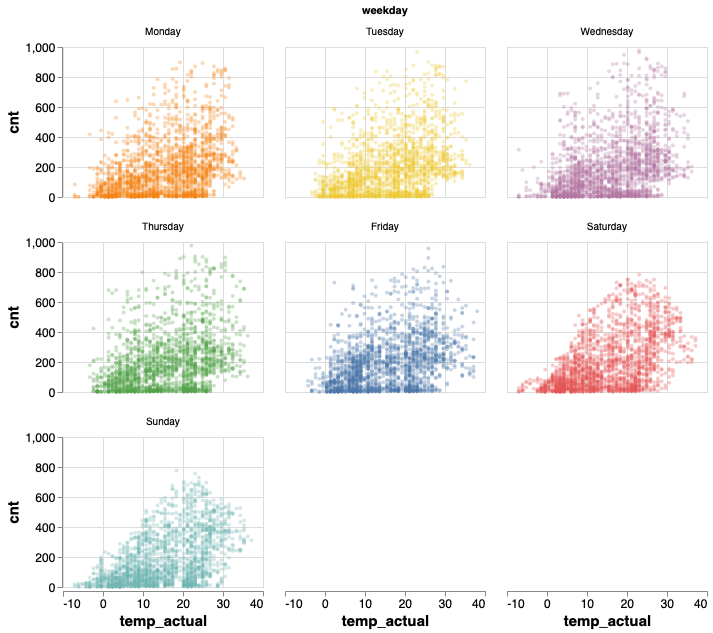

In [33]:
order_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                 'Friday', 'Saturday', 'Sunday']

chart = alt.Chart(bike_data).mark_point(opacity=0.3, size = 4).encode(
            alt.X('temp_actual:Q'),
            alt.Y('cnt:Q'),
            color = alt.Color('weekday:N', legend=None)
        ).properties(title="Temp vs Bike Rental",
                    width=200, height=150
        ).facet(alt.Facet('weekday:N', 
                          sort = order_of_days),
                columns=3
        ).configure_axisX(labelFontSize=12,
                        titleFontSize=15
        ).configure_axisY(labelFontSize=12,
                        titleFontSize=15
        ).configure_title(fontSize=17)

# chart.save(output_path + "/fig_2_temp.png", scale_factor=2.0) #<-- .py
chart.save('../results/fig_2_temp.png', scale_factor=2.0)
chart

**Observations:** In general, the demand for rental bikes increases when the weather is warmer and decreases when the temperature is lower; this particular behaviour is more observed on weekends. Also, from this comparison, we can see that more bikes are rented on weekdays, probably because people commute to their work or school.

### 7.2 Analysis of hour and weekday on bike rental count 

With the previous analysis, we can think that people use the rental bikes for different objectives in the function of the day of the week. This is a good point to arise another question: does the hour also affect the demand for bike rentals?

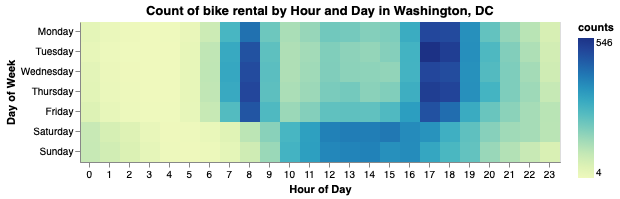

In [34]:
heat_map = alt.Chart(bike_data_2).mark_rect().encode(
                x = alt.X("hr:O", 
                          title = "Hour of Day", 
                          axis = alt.Axis(labelAngle = 0)),
                y = alt.Y('weekday:O',
                          sort=order_of_days,
                          title = "Day of Week"),
                color=alt.Color('cnt:Q', 
                                legend=alt.Legend(title = "counts")),
                tooltip=['weekday', 'hr', 'cnt']
            ).properties(title = "Count of bike rental by Hour and Day in Washington, DC")
# heat_map.save(output_path + "/fig_3_hr.png", scale_factor=2.0) # <-- .py
heat_map.save("../results/fig_3_hr.png", scale_factor=2.0)
heat_map

**Observations**: In the previous plot we can confirm the hypothesis that people use the bike rentals mainly for work and school on the weekdays showing the peak of the demand in two times of the day: in the morning around 8 hr., and the afternoon between 17 and 18 hr.; on the weekends people use the rental bikes between 11 and 16 hours.  
In the other hand, the time with the lowest demand of rental bikes is between 1 and 5 hr. everyday.

### 7.3 Analysis of weather and humidity on demand for rental bikes

To rent or not to rent a bike, that is the question. And the answer would not be only based on temperature, day and time, but also it would be important to think about weather and humidity, because is not the same to ride a bike on a sunny day than in a rainy one.

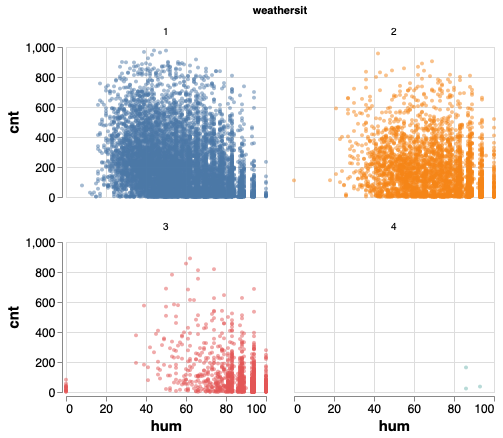

In [35]:
chart = alt.Chart(bike_data).mark_point(opacity=0.5, size = 4).encode(
            alt.X('hum:Q'),
            alt.Y('cnt:Q'),
            color = alt.Color('weathersit:N', legend=None)
        ).properties(title="Temp vs Bike Rental",
                    width=200, height=150
        ).facet(alt.Facet('weathersit:N', 
                          sort = order_of_days),
                columns=2
        ).configure_axisX(labelFontSize=12,
                        titleFontSize=15
        ).configure_axisY(labelFontSize=12,
                        titleFontSize=15
        ).configure_title(fontSize=17)
# chart.save(output_path + "/fig_4_weather.png", scale_factor=2.0) #<--.py
chart.save("../results/fig_4_weather.png", scale_factor=2.0)
chart

**Observations**: To understand the previous graphs it will be important to remmember that the weather (`weathersit`) with number 1 is related to a mainly sunny day, while 2 recalls a misty day, a 3 would reference to a lightly rain or snowy day, and 4 with heavy rain, snow or ice.  

In general we could see that people preffer to ride the rental bikes in sunny days, followed by days with mist, and few people rent then on days with light rain, and as it is logic almost nobody rent bikes on days with heavy rain or snow.  
In the other hand, we can observe the demand for bike rental increases in days less humid. 

### 7.4 Correlation matrix 

Which variables are related which each other? That's a question for the correlation matrix!

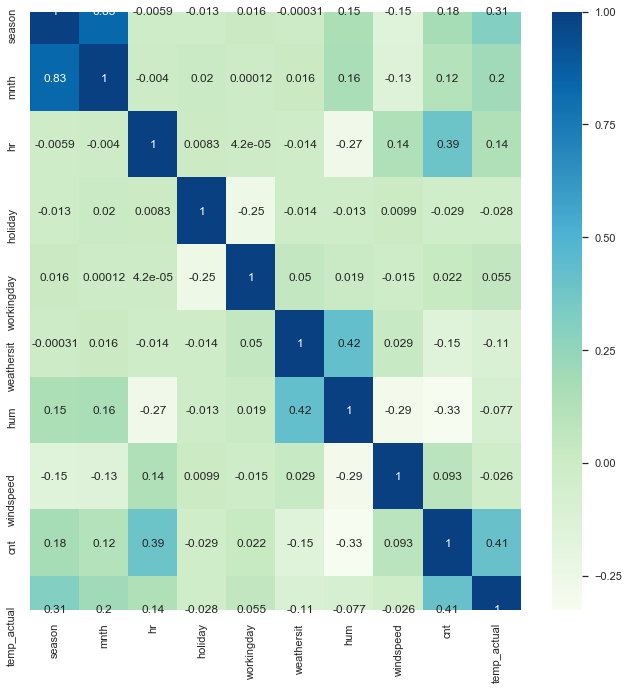

In [38]:
sns.set(rc={'figure.figsize':(11,11)})
corrMatrix = bike_data.corr()
#sns.heatmap(corrMatrix, annot=True, #<-- .py
#            cmap="GnBu").get_figure().savefig(output_path + "fig_5_corr.png") #<-- .py

sns.heatmap(corrMatrix, annot=True, 
            cmap="GnBu").get_figure().savefig("../results/fig_5_corr.png")

**Observations**:In the previous table we can find which variables are related with each other. Over all correlations, it stands out the relation between the `month` and the `season` which make sense with a correlation of 0.83.

Additionally, as we could imagine for the previous plots and comments, in this table we can see that for the number of bike rented (`cnt`), there are two variables that stands out for its high correlation with the target variable: the temperature (`temp_actual`) and the hour of the day (`hr`), both with a correlation around 0.40, followed by humidity with a coefficient equals to -0.33.


## References

> Hadi Fanaee-T 
>
> Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto. 
INESC Porto, Campus da FEUP 
Rua Dr. Roberto Frias, 378 
4200 - 465 Porto, Portugal 
>
>Original Source: http://capitalbikeshare.com/system-data  
>Weather Information: http://www.freemeteo.com   
>Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule  